# Capstone Project 1: Optimizing a Bank's Marketing Costs by Predicting the Success of Telemarketing Efforts

## TOC:
* [1. Introduction](#1.-Introduction)
    * [1.1 Data Source and Importation](#1.1-Data-Source-and-Importation)
    * [1.2 Data Cleaning](#1.2-Data-Cleaning)
* [2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    * [2.1 Demographic Characteristics](#2.1-Demographic-Characteristics)
    * [2.2 Socioeconomic Variables](#2.2-Socioeconomic-Variables)
    * [2.3 Marketing Campaign Variables](#2.3-Marketing-Campaign-Variables)
    * [2.4 Economic Indicators](#2.4-Economic-Indicators)
* [3. Statistical Testing](#3.-Statistical-Testing)
    * [3.1 Effect of Ocupation on the Success of Marketing Campaigns](#3.1-Effect-of-Ocupation-on-the-Success-of-Marketing-Campaigns)
    * [3.2 Effect of Marital Status on the Success of Marketing Campaigns](#3.2-Effect-of-Marital-Status-on-the-Success-of-Marketing-Campaigns)
* [4. Predictive Modeling](#4.-Predictive-Modeling)
    * [4.1 Preprocessing](#2.1-Demographic-Characteristics)
    * [4.2 Training and Testing Datasets](#4.2-Training-and-Testing-Datasets)
    * [4.3 Training Model](#4.3-Training-Model)
    * [4.4 Evaluating Models](#4.4-Evaluating-Models)
    * [4.5 Model Tuning](#4.5-Model-Tuning)
* [5. Conclusion](#5.-Conclusion)
    * [5.1 Results](#5.1-Results)
    * [5.2 Final Thoughts](#5.2-Final-Thoughts)

# 1. Introduction

Banks and insurance companies are all trying to look for more and more ways to reduce their operating expenses. Some banks have even gone so far to remove traditional “brick-and-mortar” locations and/or run their operations entirely online (e.g., Ally Financial, Robinhood). One large driver of a banks’ expense ratios includes marketing costs, and banks are constantly trying to find more ways to optimize their operational efficiencies.

While browsing the business section of Google News, I've seen more and more headlines repeating the same thing: "Financial Institution ABC is implementing AI & Machine learning models which are expected to increase our operational efficiencies by reducing costs by X%". After seeing this phrase repeated over and over again in quarterly and annual investor reports, one must wonder...is this really the case?? Do companies just love using buzzwords to keep investors happy? Do companies really expect to see double digit % reduction in expenses by implementing a machine learning model? What does this really mean? 

I wanted to gain a better understanding of what all these headlines actually meant. For my Capstone I Project, I've obtained a dataset from a Portugease bank institution that contains 41188 rows and 21 columns. Each row represents a different marketing campaign (i.e. a phone call made by the bank to get a customer to purchase a term deposit), with the first 20 columns being different characteristics of the campaign and the last column indicating whether or not the customer purchased a term deposit. Although we can't actually measure how much this bank can save without additional data, what this exercise will tell us how accurately a bank can predict a successfull marketing campaign. 

Summary:
* Problem: Predicting the likelihood of a bank customer purchasing a term deposit (i.e. CDs) using a dataset obtained from UCI's Marching Learning Repository

* Dataset: The dataset can be found here at http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
#Importing Relevant Packages
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

# 1.1 Data Source and Importation

The dataset was obtained from UCI's Machine Learning Repository and is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
 * bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
 * bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
 * bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
 * bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [2]:
#Outdated Datasets with all examples and 17 variables
#df = pd.read_csv("bank-full.csv", delimiter = ";")
#Subset of above Dataset
#df1 = pd.read_csv("bank.csv", delimiter = ";")

#These files includes the same dataset but with more examples (41188) and 3 more variables (20 in total)
df2 = pd.read_csv("bank-additional-full.csv", delimiter = ";")
#Subset of above Dataset
#df3 = pd.read_csv("bank-additional.csv", delimiter = ";")

#Alternative method to input data
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
#r = requests.get(url)
#z = zipfile.ZipFile(io.BytesIO(r.content))
#z.extractall()

Given the description of each dataset, we will go with "bank-additional-full.csv".

# 1.2 Data Cleaning

Taking a look at the variables available for each marketing campaign:

In [3]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Inspecting quality of dataset:

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

There are 20 variables that can affect the outcome Y. The 20 variables are of either type object, int, or float, with a majority of the variables being an object. There seems to be no missing values.


A description of each variable can be found below:

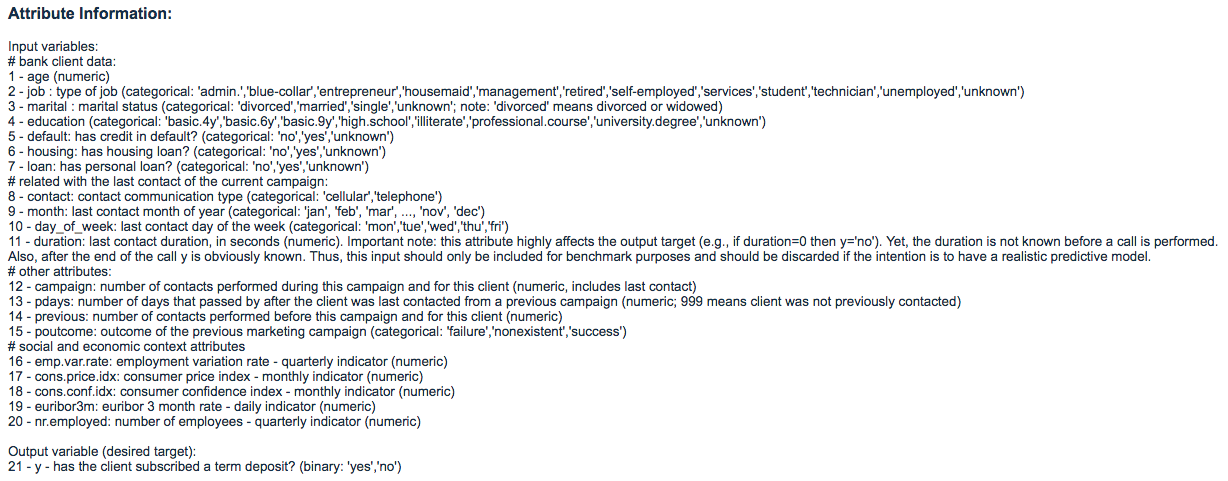


Right away, I hypothesized some variables as having little to no impact on Outcome Y. Furthermore, even though we didn't find any NaN values, it looks like we should do some high-level cleaning (e.g. 999 for "pdays" column) and discard the "duration" variable for the time being given that the description of the variable says this "should only be includued for benchmark purposes and should be discarded if the intention is to have a realistic predictive model". 

In [5]:
df2.drop(columns = ["duration"], axis = 1, inplace = True)
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In addition to each individual variable, I thought some variables could be grouped into different types or groups and I hypothesize certian groups of variables to be more relevant in predicting the outcome variable Y. To get a better understanding of how each group of variables might affect outcome Y, I split up the 19 (excludes duration) variables into 4 groups:
1. Demographic Characteristics (age, job, marital, education)
2. Socioeconomic Variables (default, housing, loan) 
3. Marketing Campaign Variables (contact, month, day_of_week, campaign, pdays, previous, poutcome)
4. Economic Indicators (emp.var.rate, cons.conf.idx, euribor3m, nr.employed)

In [6]:
#Grouping variables by type
demographic = ["age", "job", "marital", "education"]
socioeconomic = ["default", "housing", "loan"]
marketing = ["contact", "month", "day_of_week", "campaign", "pdays", "previous", "poutcome"]
economic = ["emp.var.rate", "cons.conf.idx", "euribor3m", "nr.employed"]

For convenience, I've also divided the variables into categorical and numerical variables

In [7]:
categorical_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
numerical_vars = ["age", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribo3m", "nr.employed"] 

I've also added a column encoding the output variable into 0 for "no" and 1 for "yes"

In [8]:
df2["y_binary"] = df2["y"]
df2["y_binary"] = df2["y_binary"].map({"no":0, "yes":1})
df2.loc[:,"y":"y_binary"]

,y,y_binary
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
5,no,0
6,no,0
7,no,0
8,no,0
9,no,0


# 2. Exploratory Data Analysis

We will explore the effects of Demographic Characteristics, Financial Indicators, Marketing Campaign Characteristics, and Economic Indicators on Outcome Y - did the bank customer purchase a term deposit? 

Before we get into any machine learning models, I wanted to explore the relationship between our variables and outcome variable Y. Right away, I wanted to see how our numerical variables correlate with the outcome variable and each other. To do this, we will perform a simple correlation matrix but we should first investigate the actual values for each numerical variable:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18f050d0>,
      dtype=object)

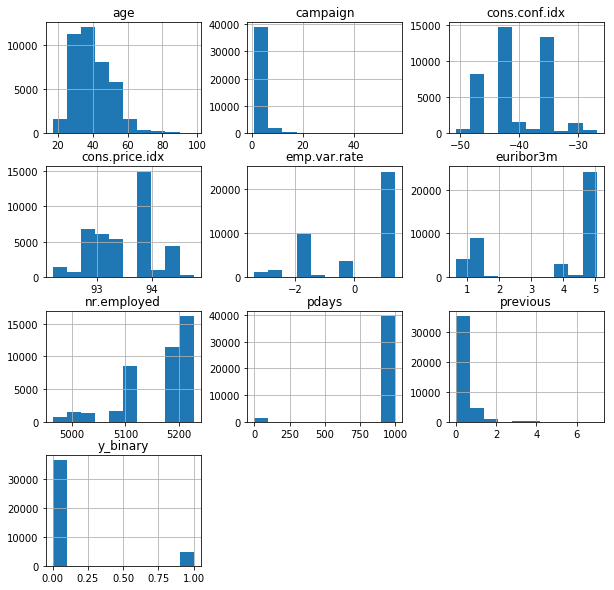

In [9]:
df2.hist(figsize = (10,10))

With the above exhibits, we can note that some of our numerical variables have extreme outliers. For example, most customers had a value of 999 for "pdays". We noted this earlier when looking through the descriptions of each variable. This is something we should note in future analyses.

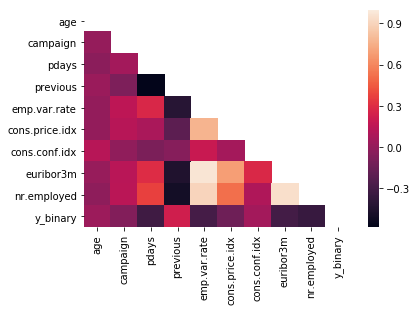

In [10]:
df_corr = df2.corr()
mask = np.zeros_like(df_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr, mask = mask)

Interestingly enough, there seems to be a high positive correlation amongst our Economic Indicator variables (e.g. emp.var.rate and euribo3m) but no strong correlations between our Outcome variable Y and all others. We'll look into this further later. 

Additionally, to get a better sense of our categorical variables, I wanted to visualize each variable by the outcome variable:

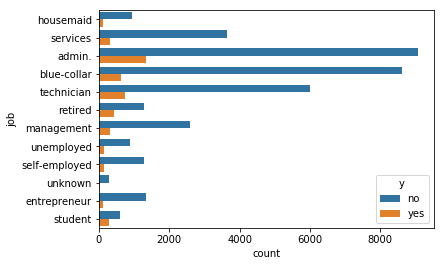

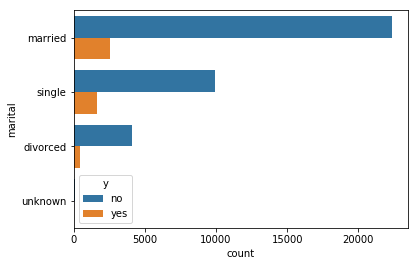

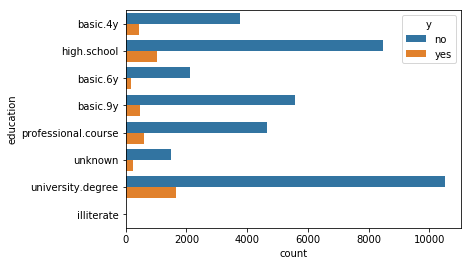

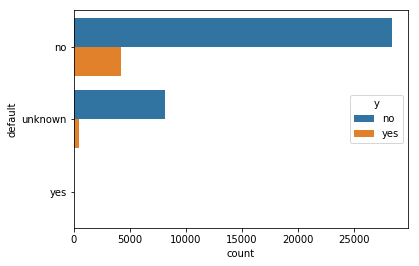

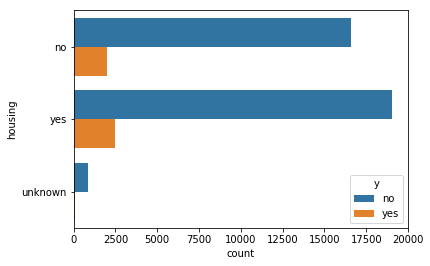

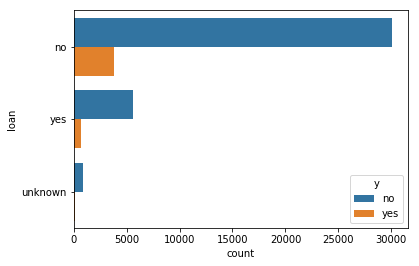

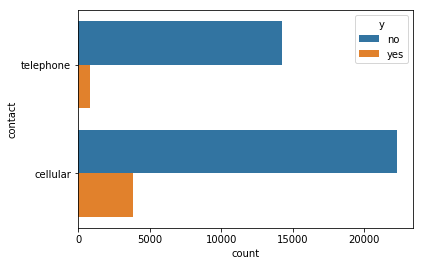

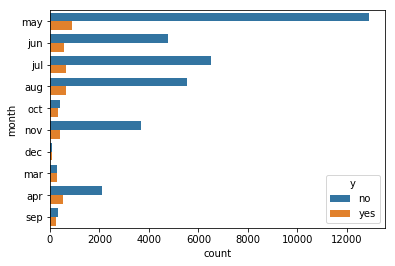

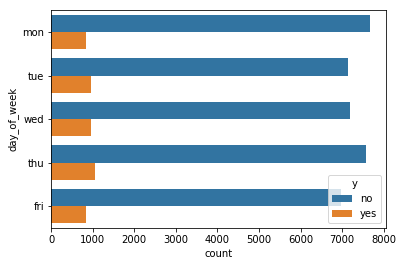

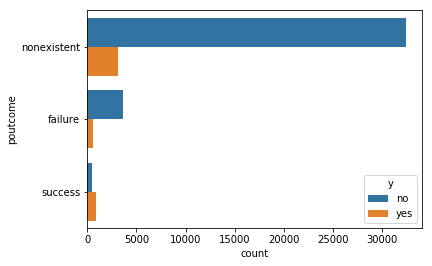

In [11]:
for var in categorical_vars:
    sns.countplot(y = var, hue = "y", data = df2)
    plt.show()

Although we cannot make any conclusions about a categorical variable being more highly correlated with yes or no, what is useful is how each categorical variable is distributed by the outcome variable. 

For example, when we look at just month (shown again below), we can note a couple of interesting observations:
 * May was the most active month for marketing campaigns
 * Both "Yes" and "No" occured most frequently in May (This is not to say that people were more likely to say yes or no in May than other months)
 * March was the month with the most even split between "Yes" and "No"

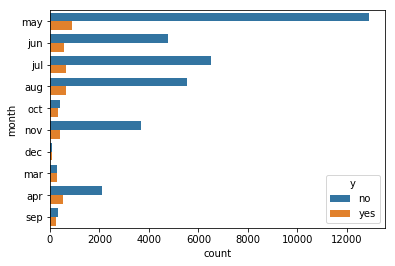

In [12]:
sns.countplot(y = "month", hue = "y", data = df2)
plt.show()

Through these preliminary exhibits, we also noted a good amount of "unknown" values in certain categorical variables such as "education" and "default". We may want to make a note of this and consider taking them out if they interfere with our machine learning model when we preprocess our feature variables.

## 2.1 Demographic Characteristics
Includes Age, Job, Marital Status, Education

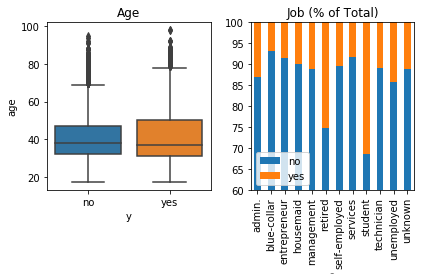

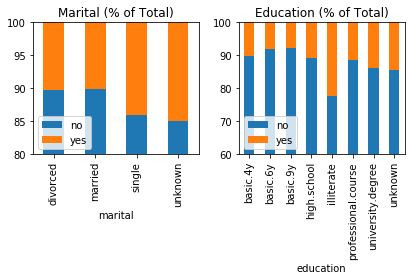

In [13]:
#Using seaborn for visual EDA
fig, axes = plt.subplots(nrows=1, ncols=2)
#sns.countplot

#Age
sns.boxplot(x = "y", y = "age", data = df2, ax = axes[0])
axes[0].set_title("Age")

#Job
job_df = df2.groupby(["job","y"]).size()
job_df = job_df.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
job_df = pd.DataFrame(job_df)
job_df.unstack().plot(kind = "bar", stacked = True, ax = axes[1])
axes[1].legend(["no", "yes"], loc = "lower left")
axes[1].set_xlabel("Jobs", fontsize = 2)
axes[1].set_ylim((60,100))
axes[1].set_title("Job (% of Total)")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2)
#Marital
marital_df = df2.groupby(["marital", "y"]).size()
marital_df = marital_df.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
marital_df = pd.DataFrame(marital_df)
marital_df.unstack().plot(kind = "bar", stacked = True, ax = axes[0])
#marital_df.plot.bar(ax = axes[0])
axes[0].legend(["no", "yes"], loc = "lower left")
axes[0].set_ylim((80,100))
axes[0].set_title("Marital (% of Total)")

#Education
education_df = df2.groupby(["education", "y"]).size()
education_df = education_df.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
education_df = pd.DataFrame(education_df)
education_df.unstack().plot(kind = "bar", stacked = True, ax = axes[1])
#education_df.plot.bar(ax = axes[1])
axes[1].legend(["no", "yes"], loc = "lower left")
axes[1].set_ylim((60,100))
axes[1].set_title("Education (% of Total)")

plt.tight_layout()
plt.show()

After looking at our demographic variables, we can see a trend that people who bought a term deposit are more likely to have the following characteristics:
* Age: Older
* Job: Retired or Student
* Marital: Single
* Education: Illtirate

It doesn't seem right that illerature customers were more likely to purchase a term deposit. Perhaps there is a second variable going on...are illiterate customers mainly older and is it the case that education might not matter? We'll look into this further later on with statistical testing.

## 2.2 Socioeconomic Variables
Includes housing, loan

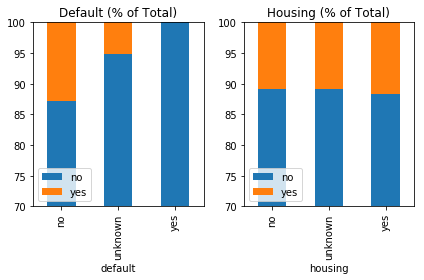

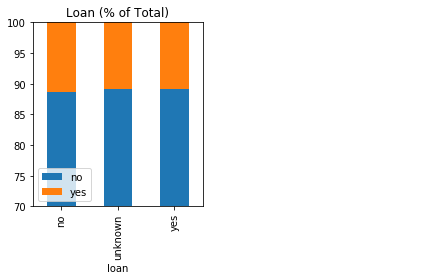

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
#Default
default_df = df2.groupby(["default", "y"]).size()
default_df = default_df.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
default_df = pd.DataFrame(default_df)
default_df.unstack().plot(kind = "bar", stacked = True, ax = axes[0])
axes[0].legend(["no", "yes"], loc = "lower left")
axes[0].set_ylim((70,100))
axes[0].set_title("Default (% of Total)")

#Housing
housing_df = df2.groupby(["housing", "y"]).size()
housing_df = housing_df.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
housing_df = pd.DataFrame(housing_df)
housing_df.unstack().plot(kind = "bar", stacked = True, ax = axes[1])
axes[1].legend(["no", "yes"], loc = "lower left")
axes[1].set_ylim((70,100))
axes[1].set_title("Housing (% of Total)")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[-1].axis("off")

#Loan
loan_df = df2.groupby(["loan", "y"]).size()
loan_df = loan_df.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
loan_df = pd.DataFrame(loan_df)
loan_df.unstack().plot(kind = "bar", stacked = True, ax = axes[0])
axes[0].legend(["no", "yes"], loc = "lower left")
axes[0].set_ylim((70,100))
axes[0].set_title("Loan (% of Total)")

plt.tight_layout()
plt.show()

After looking at our financial indicator variables, we can note the following trends:
* Default: People who default do not purchase term deposits at all. People who do not default are more likely to purchase a term deposit than those who do default
* Housing: No difference between no housing, yes housing, and unknown housing
* Loan: No difference in no loan, yes, loan, and unknown loan

## 2.3 Marketing Campaign Variables
Includes contact, month, day_of_week, campaign, pdays, previous, and poutcome

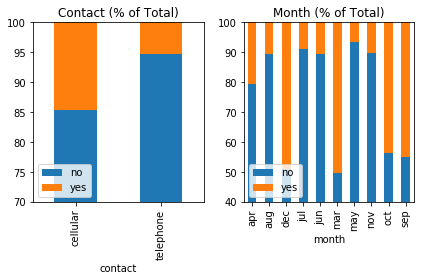

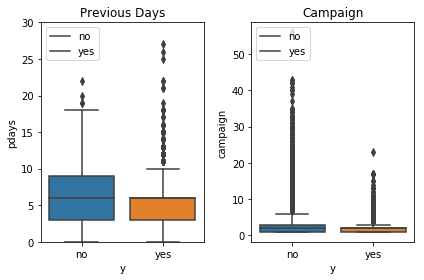

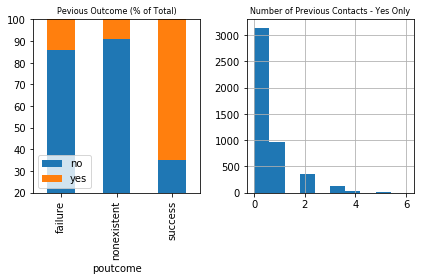

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)
#Contact
contact_df = df2.groupby(["contact", "y"]).size()
contact_df = contact_df.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
contact_df = pd.DataFrame(contact_df)
contact_df.unstack().plot(kind = "bar", stacked = True, ax = axes[0])
axes[0].legend(["no", "yes"], loc = "lower left")
axes[0].set_ylim((70,100))
axes[0].set_title("Contact (% of Total)")

#Month
month_df = df2.groupby(["month", "y"]).size()
month_df = month_df.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
month_df = pd.DataFrame(month_df)
month_df.unstack().plot(kind = "bar", stacked = True, ax = axes[1])
axes[1].legend(["no", "yes"], loc = "lower left")
axes[1].set_ylim((40,100))
axes[1].set_title("Month (% of Total)")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2)
#duration
#sns.boxplot(x = "y", y = "duration", data = df2, ax = axes[0])
#axes[0].set_title("Duration")

#pdays
pdays_df = df2.loc[df2["pdays"] != 999]
sns.boxplot(x = "y", y = "pdays", data = pdays_df, ax = axes[0])
axes[0].set_title("Previous Days")
axes[0].legend(["no", "yes"], loc = "upper left")
axes[0].set_ylim(0, 30)

#Campaign
sns.boxplot(x = "y", y = "campaign", data = df2, ax = axes[1])
axes[1].set_title("Campaign")
axes[1].legend(["no", "yes"], loc = "upper left")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2)

#poutcome
poutcome_df = df2.groupby(["poutcome", "y"]).size()
poutcome_df = poutcome_df.groupby(level = 0).apply(lambda x: 100*x / float(x.sum()))
poutcome_df = pd.DataFrame(poutcome_df)
poutcome_df.unstack().plot(kind = "bar", stacked = True, ax = axes[0])
axes[0].legend(["no", "yes"], loc = "lower left")
axes[0].set_ylim((20,100))
axes[0].set_title("Pevious Outcome (% of Total)", fontsize = 8)

#previous
axes[1].set_title("Number of Previous Contacts - Yes Only", fontsize = 8)
previous_df = df2.loc[(df2["y"] == "yes")]
previous_df["previous"].hist(ax = axes[1])


plt.tight_layout()
plt.show()

We can note the following about previous marketing campaigns:
* Contact: Customers more likely to purchase term deposit with cellphone than telephone
* Month: Top 3 months were March, June, and September
* Duration: Longer campaigns were more effective
* Campaign: No difference
* Previous Days: Most people who purchased a term deposit purchased it when the previous failed contact was < 5 days
* Previous Contact: Highest success seen in 3-4 previous contacts
* Previous Outcome: To no surprise, those that previously purchased a term deposit were most likely to purchase another term deposit rather than those who didn't or are unknown

## 2.4 Economic Indicators
Includes emp.var.rate, cons.conf.idx, euribor3m and nr.employed

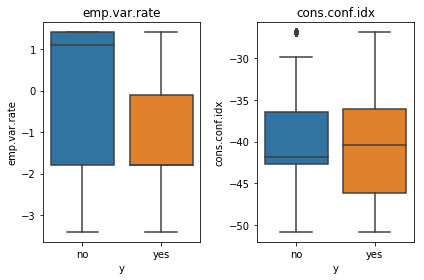

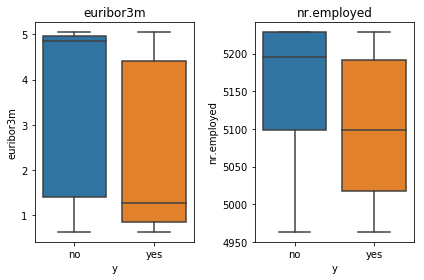

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)
#emp.var.rate
sns.boxplot(x = "y", y = "emp.var.rate", data = df2, ax = axes[0])
axes[0].set_title("emp.var.rate")

#cons.conf.idx
sns.boxplot(x = "y", y = "cons.conf.idx", data = df2, ax = axes[1])
axes[1].set_title("cons.conf.idx")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2)
#euribor3m"
sns.boxplot(x = "y", y = "euribor3m", data = df2, ax = axes[0])
axes[0].set_title("euribor3m")

#nr.employed
sns.boxplot(x = "y", y = "nr.employed", data = df2, ax = axes[1])
axes[1].set_title("nr.employed")

plt.tight_layout()
plt.show()

These economic indicators will be more relevant once we get to our predictive modelling, so we'll ignore these for now.

# 3. Statistical Testing

We've observed the following interesting trends:
* Are students or retired people more likely to purchase a term deposit?
* Are single people more likely to purchase a term deposit?
* Are there no differences in people who own a home and don't own a home?
* Are cellphones truly more effective than telephones?
* Is there a significant difference between months?

For the purposes of this capstone project, these trends will be explored in more detail with statistical testing:
* Are students or retired people more likely to purchase a term deposit?
* Are single people more likely to purchase a term deposit?

# 3.1 Effect of Ocupation on the Success of Marketing Campaigns

In [17]:
#z-tests
import statsmodels.api as sm

#Null Hypothesis: Are students less likely to purchase a term deposit? 
job_df_stats = df2.groupby(["job","y"]).size()
count = [job_df_stats["student"]["yes"], (df2["y"] == "yes").sum()]
obs = [job_df_stats["student"][:].sum(), len(df2["y"])]
z_score, p_value = sm.stats.proportions_ztest(count, obs)
print("Job - Student")
print(z_score, p_value)

#Null Hypothesis: Are retired people less likely to purchase a term deposit? 
count = [job_df_stats["retired"]["yes"], (df2["y"] == "yes").sum()]
obs = [job_df_stats["retired"][:].sum(), len(df2["y"])]
z_score, p_value = sm.stats.proportions_ztest(count, obs)
print("Job - Retired")
print(z_score, p_value)

Job - Student
(18.372510108638092, 2.1808840889445941e-75)
Job - Retired
(17.575588205685783, 3.7893984323297954e-69)


# 3.2 Effect of Marital Status on the Success of Marketing Campaigns

In [18]:
#Alternative way to slice df
#Null Hypothesis: Are single people less likely to purchase a term deposit?
count = [len(df2.loc[(df2["marital"] == "single") & (df2["y"] == "yes")]), len(df2.loc[(df2["y"] == "yes")])]
obs = [len(df2.loc[df2["marital"] == "single"]["y"]), len(df2["y"])]
z_score, p_value = sm.stats.proportions_ztest(np.array(count), np.array(obs))
print("Marital")
print(z_score, p_value)

Marital
(8.048316325649528, 8.394076405883269e-16)


Since the z-test z-scores were 18.4 for Students and 17.6 for Retired customers with extremely low p-values, we can interpret this as the callback proportions being more than 17 standard deviations away from the mean of 0 difference. We should reject the null hypothesis. In other words, we can confidently say that there is statistical difference in marketing success rates for single, students, and retired customers.

# 4. Predictive Modeling

# 4.1 Data Preprocessing

Before we perform any predictive modeling, we'll process our variables using the sklearn package. 

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score

Before we encode our feature variables, we should find a way to deal with our unknown values in our categorical feature variables

In [20]:
#Dealing with unknown values in categorical feature variables
for var in categorical_vars:
    print(df2[var].value_counts())
    print("NAs for " + var + " : " + str((df2[var] == "unknown").sum()))
    #Print value of most frequently occuring value so we can replace unknowns
    print("Most frequently occuring value is: " + str(df2[var].value_counts().idxmax()))
    df2.loc[df2[var] == "unknown", var] = df2[var].value_counts().idxmax()
    print("\n")

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
NAs for job : 330
Most frequently occuring value is: admin.


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
NAs for marital : 80
Most frequently occuring value is: married


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
NAs for education : 1731
Most frequently occuring value is: university.degree


no         32588
unknown     8597
yes            3
Name: default, dtype: int64
NAs for default : 8597
Most frequently occuring val

Now that we've imputed unknown values in our categorical features with the most frequently occuring value, we can proceed with encoding them. Let's check to make sure we have no more unknowns:

In [21]:
for var in categorical_vars:
    print(df2[var].value_counts())

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64
married     25008
single      11568
divorced     4612
Name: marital, dtype: int64
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64
no     41185
yes        3
Name: default, dtype: int64
yes    22566
no     18622
Name: housing, dtype: int64
no     34940
yes     6248
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
thu    8623
mon    8514
wed

Now we can encode our feature variables using sklearn's LabelEncoder function:

In [22]:
#Processing Feature Variables

#Using LabelEncoder
le = preprocessing.LabelEncoder()
df2_le = df2
df2_le["job"] = le.fit_transform(df2_le["job"])
df2_le["marital"] = le.fit_transform(df2_le["marital"])
df2_le["education"] = le.fit_transform(df2_le["education"])
df2_le["default"] = le.fit_transform(df2_le["default"])
df2_le["housing"] = le.fit_transform(df2_le["housing"])
df2_le["loan"] = le.fit_transform(df2_le["loan"])
df2_le["contact"] = le.fit_transform(df2_le["contact"])
df2_le["month"] = le.fit_transform(df2_le["month"])
df2_le["day_of_week"]  = le.fit_transform(df2_le["day_of_week"])
df2_le["poutcome"] = le.fit_transform(df2_le["poutcome"])

#Using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = categorical_vars)
#df2_ohe = df2
#df2_ohe["job"] = onehotencoder.fit_transform(df2_ohe["job"]).toarray()
#df2_ohe["marital"] = onehotencoder.fit_transform(df2_ohe["marital"]).toarray()
#df2_ohe["education"] = onehotencoder.fit_transform(df2_ohe["education"]).toarray()
#df2_ohe["default"] = onehotencoder.fit_transform(df2_ohe["default"]).toarray()
#df2_ohe["housing"] = onehotencoder.fit_transform(df2_ohe["housing"]).toarray()
#df2_ohe["loan"] = onehotencoder.fit_transform(df2_ohe["loan"]).toarray()
#df2_ohe["contact"] = onehotencoder.fit_transform(df2_ohe["contact"]).toarray()
#df2_ohe["month"] = onehotencoder.fit_transform(df2_ohe["month"]).toarray()
#df2_ohe["day_of_week"]  = onehotencoder.fit_transform(df2_ohe["day_of_week"]).toarray()
#df2_ohe["poutcome"] = onehotencoder.fit_transform(df2_ohe["poutcome"]).toarray()
#OHE = onehotencoder.fit_transform(df2[categorical_vars]).toarray()

#Changing y to y_binary
df2_le["y"] = df2_le["y_binary"]

Before we do any sort of predictive modeling, we will split our dataframe into a feature array and target array:

In [23]:
#Creating Feature Array
X = df2_le.iloc[:, 0:19]
#Creating Target Array
y = df2_le.loc[:, "y"]

# 4.2 Training and Testing Datasets

Then, we will split our dataset into training and testinig  datasets

In [24]:
#Splitting Training and Testing Datasets - 70/30
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
print(x_train.shape)
print(y_test.shape)

(28831, 19)
(12357,)


# 4.3 Training Model

We will try different classification specific classifiers to train our model. The following classifiers will be used:
 * KKN
 * Logistic Regression
 * Random Forest

Let's first try K-nearest neighbors:

In [26]:
#KKN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_score = accuracy_score(y_test, knn_predict)

print(knn_score)

0.898761835396941


Logistic Regression:

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(x_train, y_train)
log_reg_predict = log_reg.predict(x_test)
log_reg_score = accuracy_score(y_test, log_reg_predict)

print(log_reg_score)

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8986809096058914


Random Forest:

In [28]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(x_train, y_train)
rfc_predict = rfc.predict(x_test)
rfc_score = accuracy_score(y_test, rfc_predict)

print(rfc_score)

/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8922068463219228


We notice that all 3 of our classifiers performed pretty well. However, we should be careful with using right away we accuracy score as a useful metric to evaluate our models because of the imbalance of "Yes" and "No" in our Outcome variable. This is a classic class imbalance problem. As such, we will use other evaluation metrics

# 4.4 Evaluating Models

Since we experience a class imbalance problem, we will use more nuanced evaluation metrics. To evaluate the performance of our models, we will use AUROC scores:

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def classifier_test(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    model_pred = model.predict_proba(x_test)[:,1]
    #print("Final accuracy score: {:.4f}".format(accuracy_score(y_test, model_pred)))
    #print("Final precision score: {:.4f}".format(precision_score(y_test, model_pred)))
    #print("Final Recall score: {:.4f}".format(recall_score(y_test, model_pred)))
    #print(classification_report(y_test, model_pred)) 
    print("Final AUROC score: {:.4f}".format(roc_auc_score(y_test, model_pred)))

### KNN

In [30]:
classifier_test(knn, x_train, y_train, x_test, y_test)

Final AUROC score: 0.7696


### Logistic Regression

In [31]:
classifier_test(log_reg, x_train, y_train, x_test, y_test)

Final AUROC score: 0.7579


### Random Forest

In [32]:
classifier_test(rfc, x_train, y_train, x_test, y_test)

Final AUROC score: 0.7520


Using AUROC scores, KKN classifer performed the best. In the next section, we will try different hyperparameters for each model before we come to a conclusion about the best performing model.

# 4.5 Model Tuning

### KNN - Hyperparameter Tuning and Evaluation

x = 1
x = 2
x = 3
x = 4
x = 5
x = 10
x = 25
x = 50


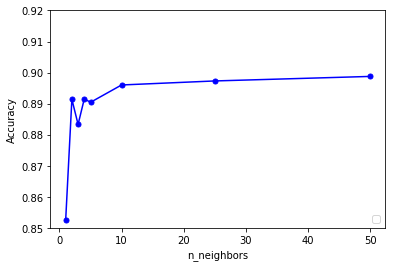

Final AUROC score: 0.7696
Final AUROC score: 0.7696


In [33]:
#Hyperparameter tuning for KNN
scores_knn = []
param_range = [1, 2, 3, 4, 5, 10, 25, 50]
for x in param_range:
    print("x = " + str(x))
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(x_train, y_train)
    score = knn.score(x_test, y_test)
    scores_knn.append(score)
   

plt.plot(param_range, scores_knn, color = "blue", marker = "o", markersize = 5)
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.85, 0.92])
plt.show()

new_knn = KNeighborsClassifier(n_neighbors = 50)
classifier_test(knn, x_train, y_train, x_test, y_test)
classifier_test(new_knn, x_train, y_train, x_test, y_test)

### Logistic Regression - Hyperparameter Tuning and Evaluation

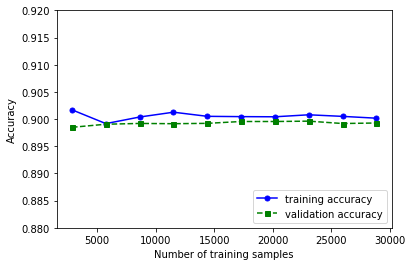

In [34]:
#Logistic Regression
from sklearn.model_selection import learning_curve, validation_curve, ShuffleSplit

lr = LogisticRegression(random_state = 0)
train_sizes, train_scores, test_scores = learning_curve(estimator = lr, 
                                                        X = X, 
                                                        y = y,
                                                        train_sizes = np.linspace(start = 0.1, stop = 1.0, num = 10), 
                                                        cv = ShuffleSplit(n_splits = 5, 
                                                                          test_size = 0.3, 
                                                                          random_state = 0))

# Plot learning curve
train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(train_sizes, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.88, 0.92])
plt.show()

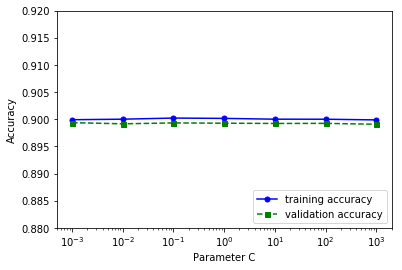

[0.89937687 0.89916646 0.89932832 0.89927976 0.8992312  0.89924739
 0.89908554]


In [35]:
# Plotting accuracy as a function of the model parameter C
param_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores, test_scores = validation_curve(estimator = lr, 
                                             X = X, 
                                             y = y,
                                             param_name = "C", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.3, 
                                                               random_state = 0))

train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xscale("log")
plt.xlabel("Parameter C")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.88, 0.92])
plt.show()

print(np.mean(test_scores, axis = 1))

Looks like we get the best score with c = 0.1

In [36]:
new_log_reg = LogisticRegression(random_state = 0, C = 1)
classifier_test(log_reg, x_train, y_train, x_test, y_test)
classifier_test(new_log_reg, x_train, y_train, x_test, y_test)

Final AUROC score: 0.7579
Final AUROC score: 0.7579


### Random Forest - Hyperparameter Tuning and Evaluation

In [ ]:
#rfc
param_range = [10, 30, 100, 300, 1000]
train_scores, test_scores = validation_curve(estimator = rfc, 
                                             X = X, 
                                             y = y,
                                             param_name = "n_estimators", 
                                             param_range = param_range, 
                                             cv = ShuffleSplit(n_splits = 5, 
                                                               test_size = 0.3, 
                                                               random_state = 0))


train_means = np.mean(train_scores, axis = 1)
test_means = np.mean(test_scores, axis = 1)

plt.plot(param_range, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
plt.plot(param_range, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
plt.xscale("log")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.85, 1])
plt.show()

In [ ]:
print(test_means)

Looks like we get the best score with n_estimators = 100

In [ ]:
new_rfc = RandomForestClassifier(random_state = 0, n_estimators = 100)
classifier_test(rfc, x_train, y_train, x_test, y_test)
classifier_test(new_rfc, x_train, y_train, x_test, y_test)

# 4.6 Model Selection

In [ ]:
classifier_test(new_knn, x_train, y_train, x_test, y_test)
classifier_test(new_log_reg, x_train, y_train, x_test, y_test)
classifier_test(new_rfc, x_train, y_train, x_test, y_test)

We should pick the random forest classifier model with n_estimators of 100 as it performed the best, when evaluating our models based off AUROC scores. 

# 5. Conclusion

# 5.1 Results

With our RFC classifier, we are able to predict whether or not a customer will purchase a term deposit ~78% of the time. This is fairly good as it beats a random predictor guessing yes or no, as the AUROC score for that would be 0.5.

The bank can implement this predictor and focus their marketing efforts on the 78% of the customers that they can accurately predict the outcome for. According to EMI, a marketing agency specialized in banking, the top 40 banks spent nearly 14b in 2017, with 17 of those banks reporting double-digit growth since the prior year. For sake of simplicity, if we assume each customer for each bank is allocated the same marketing spend and that banks do not currently use any machine learning techniques or strategic prioritization, the top 40 banks could've saved nearly ~$3b. Now I can see why machine learning applications in business operations are getting all the buzz. Although it may have seemed crazy to me before that data scientists at F500 companies go crazy trying to get that extra 0.01% accuracy, it makes sense to me now how that 0.01% increase in accuracy can make all the difference.

# 5.2 Final Thoughts

Although 0.78 AUROC is fairly good, its not great. If I had more time, it would be useful to focus on the following to see if any improvements to my classifiers are made:
* Feature Engineering:
    -  Getting rid of outliers in each variable in my feature array
    -  Trying different combinations of one-hot encoder and label encoder of categorical variables to improve the "order" (e.g., perhaps a more defined ranking system of different education or occupation values)
    -  More advanced methods of imputing unknown values, instead of just using the mode
* Model Tuning:
    -  Trying more hyperparameters for each classifier
    -  Trying more classifiers